In [1]:
import numpy as np
import random

class HopfieldNetwork:
    def __init__(self,number_of_neurons):
        self.n = number_of_neurons
        self.w = np.zeros((number_of_neurons,number_of_neurons)) #Macierz wag
        self.b = np.zeros(number_of_neurons) #Wektor progów
            
    def get_patterns_hebb(self, patterns): #Uczenie paternów za pomocą reguły Hebba
        for i in range(len(patterns)): 
            self.w += np.outer(patterns[i], patterns[i])
        self.w /= len(patterns)
        self.w -= np.identity(self.n)
        
    def get_patterns_oja(self, patterns, learning_rate=0.01, epochs=20):  #Uczenie paternów za pomocą reguły Oja
        self.get_patterns_hebb(patterns)
        for _ in range(epochs):
            for p in patterns:
                p = p.reshape(self.n, 1)
                y = np.dot(self.w.T, p)
                self.w += learning_rate * self.w * (p - self.w * y)
                self.w = (self.w + self.w.T) / 2
            self.w /= len(patterns)
            np.fill_diagonal(self.w, 0)
        
    def activation(self,x,b):
        return np.where(x >= b, 1, -1)
    
    def update_rule_async(self, state):
        updated_state = state.copy()
        order = np.random.permutation(self.n)
        for i in order:
            net_input = np.dot(self.w[i, :], state)
            updated_state[i] = self.activation(net_input, self.b[i])
        return updated_state

    def update_rule_sync(self, state):
        net_inputs = np.dot(self.w, state)
        updated_state = self.activation(net_inputs, 0)
        return updated_state

    def energy(self, state):
        return -0.5 * np.dot(state, np.dot(self.w , state))
    
    def simulate(self, state, update_rule_type, max_steps=100):
        current_state = state.copy()
        current_energy = self.energy(current_state)
        for _ in range(max_steps):
            if(update_rule_type == 'sync'):
                next_state = self.update_rule_sync(current_state)
            elif (update_rule_type == 'async'):
                next_state = self.update_rule_async(current_state)
            next_energy = self.energy(next_state)
            if np.array_equal(next_state, current_state):
                print("Network stabilized.")
                break
            elif next_energy >= current_energy:
                print("Energy increased, stopping update.")
                break
            current_state = next_state
            current_energy = next_energy
        return current_state

In [2]:
import matplotlib.pyplot as plt
def visualize_pattern(pattern,n,m):
    grid = pattern.reshape((n, m))
    fig, ax = plt.subplots()
    ax.imshow(grid, cmap='binary', interpolation='none')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

In [3]:
import csv
def read_patterns_from_csv(file_name):
    patterns = []
    with open(file_name, mode='r') as file:
        reader = csv.reader(file)
        for row in reader:
            pattern = np.array([int(x) for x in row])
            patterns.append(pattern)
    return np.array(patterns)

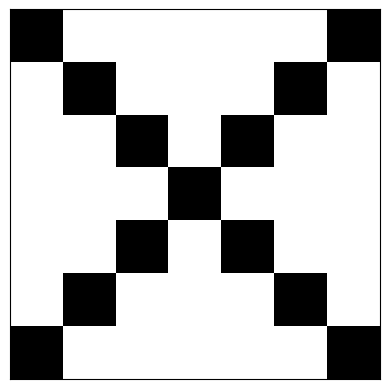

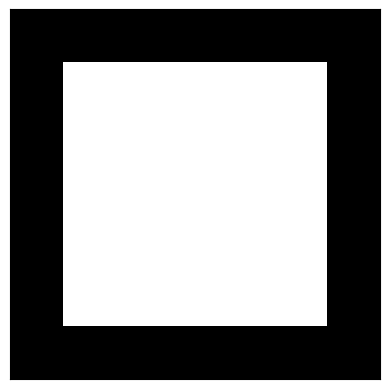

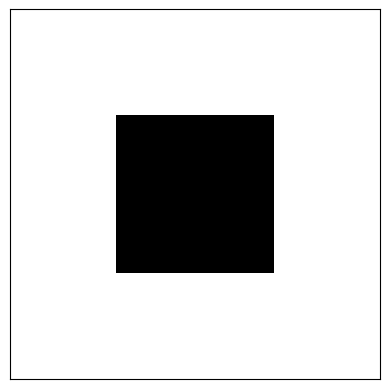

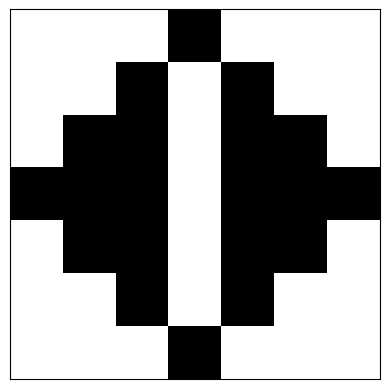

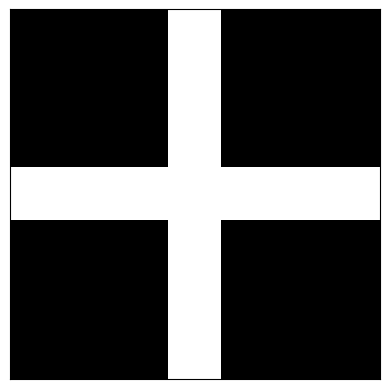

In [4]:
patterns = read_patterns_from_csv("small-7x7.csv")
for p in patterns:
    visualize_pattern(p,7,7)


Network stabilized.


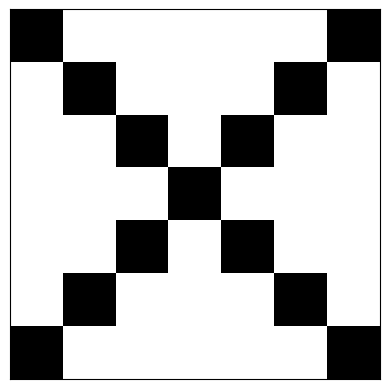

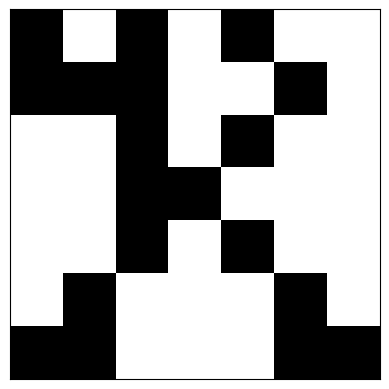

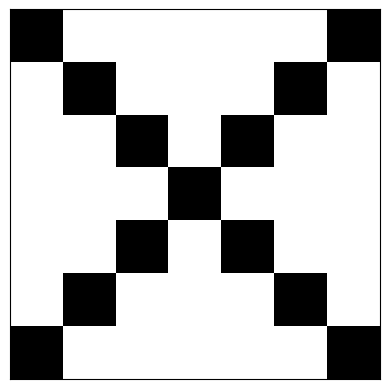

In [5]:
net = HopfieldNetwork(49)
net.get_patterns_hebb(patterns)

original_pattern = patterns[0]
noise = np.random.choice([-1, 1], size=49, p=[0.1, 0.9])  # 10% noise
noisy_input = original_pattern * noise

final_state =net. simulate(noisy_input,'sync')

visualize_pattern(original_pattern,7,7)
visualize_pattern(noisy_input,7,7)
visualize_pattern(final_state,7,7)

Network stabilized.


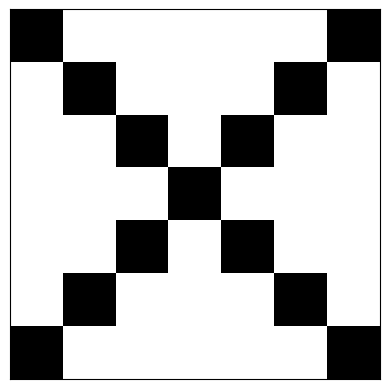

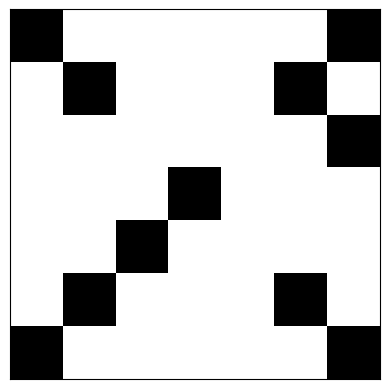

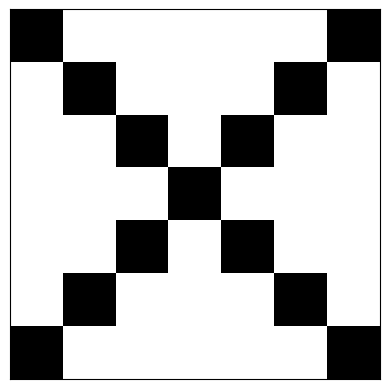

In [6]:
net_oja = HopfieldNetwork(49)
net_oja.get_patterns_oja(patterns)

original_pattern = patterns[0]
noise = np.random.choice([-1, 1], size=49, p=[0.1, 0.9])  # 10% noise
noisy_input = original_pattern * noise

final_state =net_oja. simulate(noisy_input,'async')

visualize_pattern(original_pattern,7,7)
visualize_pattern(noisy_input,7,7)
visualize_pattern(final_state,7,7)